In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn')


In [2]:
dp = pd.read_csv("FashionData/fashion-mnist_train.csv")
data = dp.values
data = data[:100,:]


In [3]:
# print(data[10])
dt = np.array(data)
np.random.shuffle(dt)
# print(data.shape)

Y = dt[:,0]
X = dt[:,1:]
print(X.shape)
print(Y.shape)
# print(X[1000])
# print(Y[1000])

x_train=np.array(X)
y_train= np.array(Y)
print(x_train.shape)
print(y_train.shape)

(100, 784)
(100,)
(100, 784)
(100,)


In [4]:
def sigmoid(z):
    
    return 1.0/(1.0 + np.exp(-1.0*z))

def hypo(x,w,b):
    
    h = np.dot(x,w) + b
    
    return sigmoid(h)

def error(y_true,x,w,b):
    
    m = x.shape[0]
    err=0.0
    
    for ix in range(m):
        hx = hypo(x[ix],w,b)
        err += y_true[ix]*np.log2(hx) + (1-y_true[ix])*np.log2(1-hx)
        
     
    return -err/m

def get_grad(y_true,x,w,b):
    
    grad_w=np.zeros(x.shape[1])
    grad_b=0.0
    
    m= x.shape[0]
    n= x.shape[1]
    for i in range(m):
        for j in range(n):
            hx = hypo(x[i],w,b)
        
            grad_w[j] += -1*(y_true[i] - hx)*x[i][j]
            grad_b += -1*(y_true[i] - hx)
        
        
    grad_w /=m
    grad_b /=m
    
    return [grad_w, grad_b]

def grad_Descent(x,y_true,w,b,lr):
    
    err=error(y_true,x,w,b)
    
    [grad_w,grad_b] = get_grad(y_true,x,w,b)
    for i in range(w.shape[0]):
             w[i] = w[i] - lr*grad_w[i]
    b = b - lr*grad_b
   
    
    return err,w,b


In [5]:
# print(y_train)
y_unik = np.unique(y_train)
ws = []
bs = []
ers=[]
print(y_unik)
for ix in y_unik:
    y_true = np.array(Y)

    
    y_true[y_true==ix] = 20
    y_true[y_true!=20] = 30

    y_true[y_true==20] = 1
    y_true[y_true==30] = 0
    x_true = X[:]
    
    W = 3*np.random.random(x_train.shape[1],)
    B = 5*np.random.random()

    for iy in range(20):
        err,W,B=grad_Descent(x_true,y_true,W,B,lr=0.5)
    

    ers.append(err)
    ws.append(W)
    bs.append(B)
    
   
    

[0 1 2 3 4 5 6 7 8 9]


/home/arif/.local/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log2
/home/arif/.local/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply
/home/arif/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
ws = np.array(ws)
bs = np.array(bs)
print(ws.shape)
# print(ws[0].shape)
print(bs.shape)
y_unik = np.unique(y_train)
print(y_unik.shape[0])
print(y_unik)

print(ws)
# print(ws)

(10, 784)
(10,)
10
[0 1 2 3 4 5 6 7 8 9]
[[ 1.1071854   2.52886478  0.99662569 ...  0.0542889   2.72156908
   0.50920471]
 [ 1.73338744  0.2547816   0.23663147 ... -0.13734544  1.12036437
   2.9521097 ]
 [ 1.45664429  0.49591713  1.15024413 ...  5.07478912  0.83970927
   0.81232589]
 ...
 [ 2.74296754  2.32382956  0.63580886 ...  1.31001984  1.63797503
   0.71829607]
 [ 2.12589772  0.16708706  2.56027593 ...  1.47977493  1.9324261
   2.73892191]
 [ 2.60614242  2.43178608  0.54660156 ... -0.59614491  1.20859602
   1.20437988]]


In [7]:
def draw(x):
    image=x.reshape((28,28))
    plt.imshow(image,cmap='gray')
    
class_table = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

class_table[2]


'Pullover'

Dress
(784,)
3


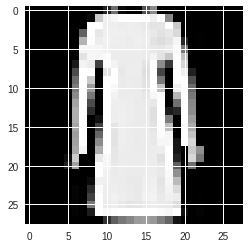

In [45]:
##Query for Manual Testing
x = X[17]
x = np.array(x)

y = Y[17]

draw(x)
print(class_table[y])

print(x.shape)
print(y)

In [46]:
##Predicting

def predict(x):
    prob=[]
    
    for i in range(bs.shape[0]):
        pro = hypo(x,ws[i],bs[i])
        prob.append(pro)
        
    
    prob=np.array(prob)
#     max = np.max(prob)
    
#     index = np.where(max)
    ind = np.argmax(prob)
    print(ind)
    print(class_table[ind])

In [47]:
print(x.shape , y.shape , ws[2].shape , bs[2].shape)
predict(x)
# print(bs.shape[0])

((784,), (), (784,), ())
3
Dress


/home/arif/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
